In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [9]:
df = pd.read_csv('data/sorted_train.csv', dtype={'sexo': str,
                                                       'ind_nuevo': str,
                                                       'ult_fec_cli_1t': str,
                                                       'indext': str}, nrows=3e6)
unique_ids = pd.Series(df['ncodpers'].unique())
unique_id = unique_ids.sample(n=1.3e5)
df = df[df.ncodpers.isin(unique_id)]

In [12]:
df.age = pd.to_numeric(df.age, errors = 'coerce')

df.antiguedad = pd.to_numeric(df.antiguedad, errors = 'coerce')
df.indrel_1mes = pd.to_numeric(df.indrel_1mes, errors = 'coerce')

In [14]:
df.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado                4770
pais_residencia             4770
sexo                        4770
age                         4770
fecha_alta                  4770
ind_nuevo                   4770
antiguedad                  4770
indrel                      4770
ult_fec_cli_1t           2017492
indrel_1mes                 4835
tiprel_1mes                 4777
indresi                     4770
indext                      4770
conyuemp                 2017921
canal_entrada              17642
indfall                     4770
tipodom                     4770
cod_prov                   20789
nomprov                    20789
ind_actividad_cliente       4770
renta                     306259
segmento                   19027
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

In [15]:
df = df.drop(['ult_fec_cli_1t', 'conyuemp'], axis = 1)

In [16]:
grouped = df.groupby('nomprov').agg({'renta': lambda x: x.median(skipna=True)}).reset_index()

new_incomes = pd.merge(df, grouped, how='inner', on='nomprov').loc[:,
                                                                  ['nomprov', 'renta_y']]

new_incomes = new_incomes.rename(columns={'renta_y': 'renta'}).sort_values('renta').sort_values('nomprov')

df.sort_values('nomprov', inplace=True)
df = df.reset_index()

new_incomes = new_incomes.reset_index()

df.loc[df.renta.isnull(), 'renta'] = new_incomes.loc[df.renta.isnull(), 'renta'].reset_index()
df.loc[df.renta.isnull(), 'renta'] = df.loc[df.renta.notnull(), 'renta'].median()

df.sort_values(by='fecha_dato', inplace=True)

In [37]:
df = df.dropna(axis = 0)

In [40]:
df.loc[df['antiguedad'] < 0, 'antiguedad'] = 0

In [41]:
df['tot_products'] = df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'].sum(axis=1)
df['tot_products'] = pd.to_numeric(df['tot_products'], errors = 'coerce')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [43]:
df['pais_residencia'].describe()

count     1984132
unique          3
top            ES
freq      1984098
Name: pais_residencia, dtype: object

In [45]:
df = df.loc[lambda df: df.pais_residencia == 'ES', :]

In [46]:
df.ind_empleado.value_counts()

N    1978403
B       2496
F       1732
A       1467
Name: ind_empleado, dtype: int64

In [47]:
df = df.loc[lambda df: df.ind_empleado == "N", :]

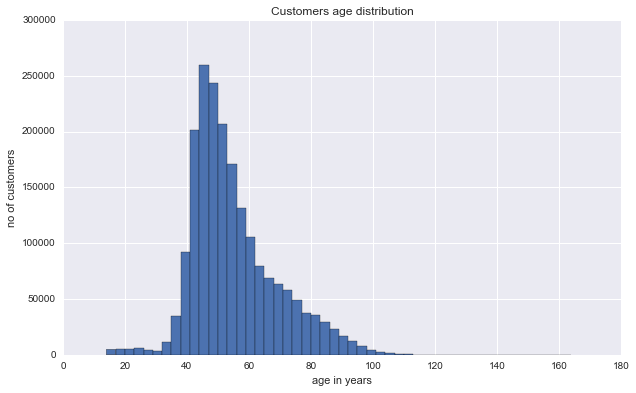

In [48]:
df['age'].hist(bins=50)
plt.title('Customers age distribution')
plt.xlabel('age in years')
plt.ylabel('no of customers')

In [49]:
df.canal_entrada.value_counts().head()

KAT    1140706
KFC     488083
KFA      61016
KAS      56922
KAY      39546
Name: canal_entrada, dtype: int64

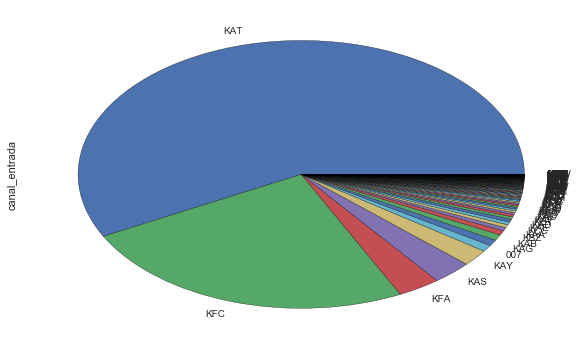

In [50]:
df.canal_entrada.value_counts().plot(x=None, y=None, kind='pie')

In [51]:
df_a = df.loc[:, ['sexo', 'ind_actividad_cliente']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
df_a = df_a.groupby(['sexo', 'ind_actividad_cliente']).sum()
df_a = df_a.T

In [52]:
df_a.head()

sexo                         H                   V          
ind_actividad_cliente      0.0       1.0       0.0       1.0
ind_ahor_fin_ult1         62.0     138.0      80.0     462.0
ind_aval_fin_ult1          0.0      34.0       0.0     128.0
ind_cco_fin_ult1       96547.0  255431.0  202948.0  519413.0
ind_cder_fin_ult1         51.0     165.0      72.0    1272.0
ind_cno_fin_ult1         264.0   97729.0     598.0  183431.0

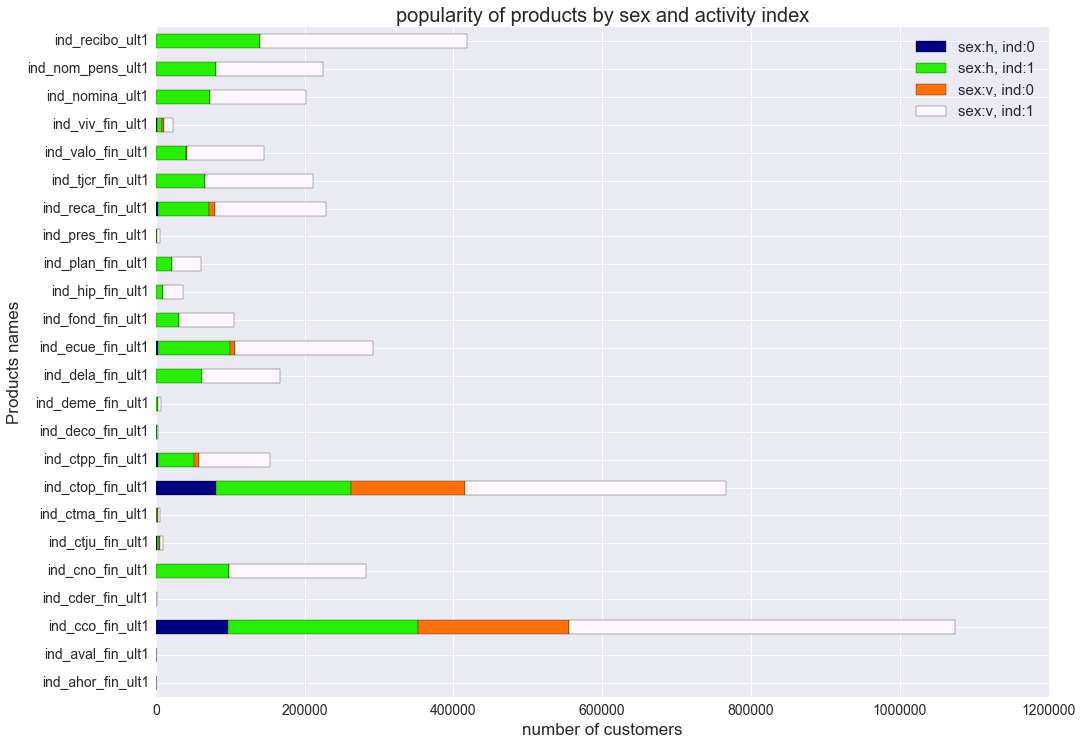

In [54]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('popularity of products by sex and activity index', fontsize=20)
plt.xlabel('number of customers', fontsize=17)
plt.ylabel('Products names', fontsize=17)
plt.legend(["sex:h, ind:0", "sex:h, ind:1", "sex:v, ind:0", "sex:v, ind:1"],
          prop={'size':15})

In [55]:
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

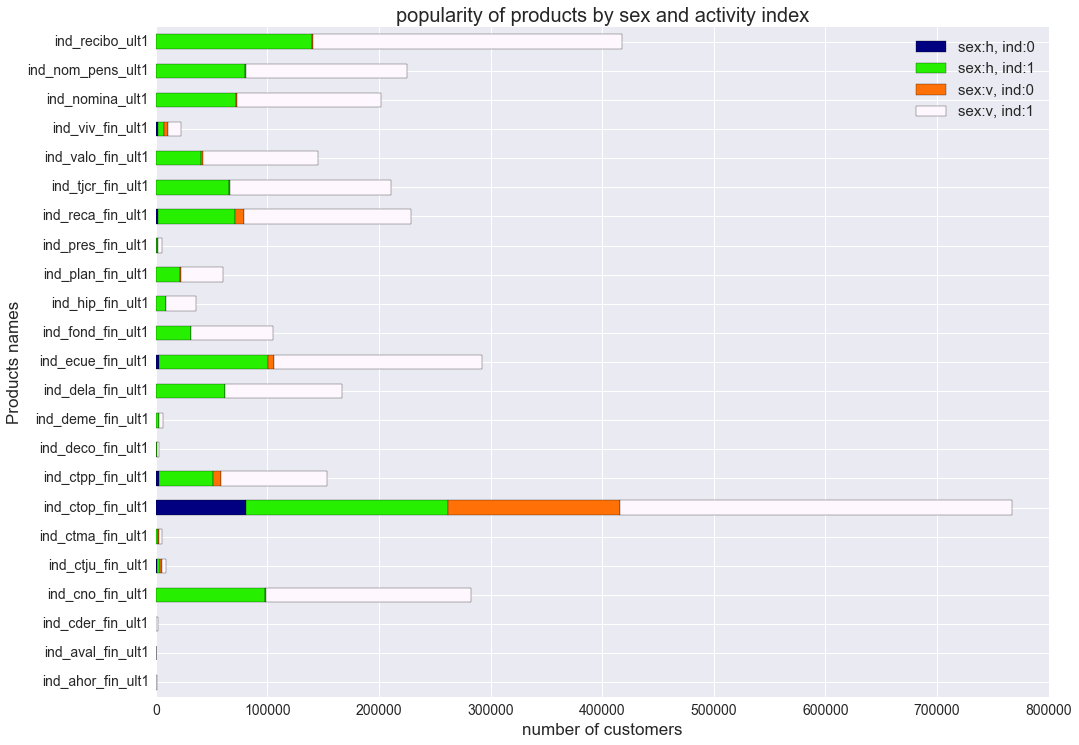

In [56]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('popularity of products by sex and activity index', fontsize=20)
plt.xlabel('number of customers', fontsize=17)
plt.ylabel('Products names', fontsize=17)
plt.legend(["sex:h, ind:0", "sex:h, ind:1", "sex:v, ind:0", "sex:v, ind:1"],
          prop={'size':15})

In [57]:
df.tot_products.value_counts()

1.0     548529
2.0     433853
0.0     373553
3.0     204525
4.0     125927
5.0      92596
6.0      77396
7.0      58721
8.0      35365
9.0      17757
10.0      6933
11.0      2449
12.0       631
13.0       147
14.0        21
Name: tot_products, dtype: int64

In [60]:
df_a = df.groupby(['age'])['tot_products'].agg('sum')

In [61]:
df_a.sort_values(ascending=False).head(20)

age
45.0    226762.0
46.0    222456.0
47.0    216420.0
44.0    214475.0
48.0    207547.0
43.0    192832.0
49.0    189293.0
50.0    176379.0
51.0    167658.0
42.0    165834.0
52.0    156971.0
53.0    151716.0
54.0    134403.0
41.0    132296.0
55.0    120322.0
56.0    111087.0
57.0    101077.0
40.0     94467.0
58.0     91869.0
59.0     81936.0
Name: tot_products, dtype: float64

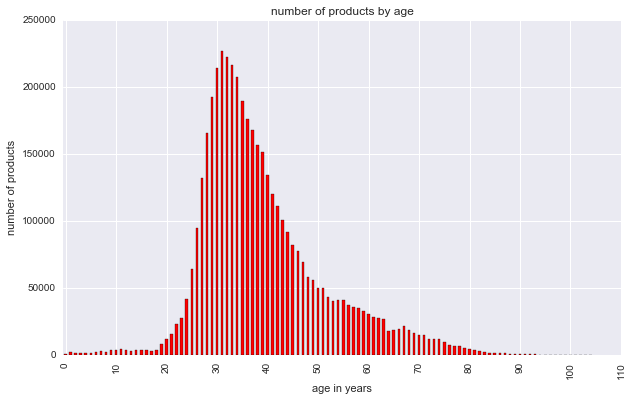

In [63]:
df_a.plot(kind='bar', colormap='autumn', legend=None)
plt.xticks(np.arange(0, 120, 10), map(str, np.arange(0, 120, 10)))
plt.title('number of products by age')
plt.xlabel('age in years')
plt.ylabel('number of products')

In [66]:
df_a = df.groupby(['segmento'])['tot_products'].agg('sum')
df_a

segmento
01 - TOP               954698.0
02 - PARTICULARES     3398369.0
03 - UNIVERSITARIO      67633.0
Name: tot_products, dtype: float64

In [69]:
df_a = df.groupby(['ind_nuevo'])['tot_products'].agg('count')
df_a

ind_nuevo
 0    1974610
 1       3793
Name: tot_products, dtype: int64

In [70]:
df_a = df.groupby(['indrel'])['tot_products'].agg('count')
df_a

indrel
1.0     1976878
99.0       1525
Name: tot_products, dtype: int64

In [73]:
df_a = df.groupby(['indrel_1mes'])['tot_products'].agg('count')
df_a

indrel_1mes
1.0    1978400
3.0          3
Name: tot_products, dtype: int64

In [74]:
df_a = df.groupby(['tiprel_1mes'])['tot_products'].agg('count')
df_a

tiprel_1mes
A    1195203
I     783197
P          3
Name: tot_products, dtype: int64

In [75]:
df_a = df.groupby(['indext'])['tot_products'].agg('count')
df_a

indext
N    1930614
S      47789
Name: tot_products, dtype: int64

In [76]:
df_a = (df.groupby(pd.cut(df['renta'], [0, 60000, 120000, 180000, 240000, pd.np.inf], right=False)).sum())

In [78]:
df_a['tot_products']

renta
[0, 60000)           337701.0
[60000, 120000)     1352724.0
[120000, 180000)    1541772.0
[180000, 240000)     577184.0
[240000, inf)        611319.0
Name: tot_products, dtype: float64

In [79]:
df_a = df_a.loc[:, 'ind_ahor_fin_ult1': 'ind_recibo_ult1']
df_a = df_a.T

In [80]:
df_a.head()

renta,"[0, 60000)","[60000, 120000)","[120000, 180000)","[180000, 240000)","[240000, inf)"
ind_ahor_fin_ult1,80.0,122.0,246.0,102.0,192.0
ind_aval_fin_ult1,0.0,0.0,49.0,74.0,39.0
ind_cco_fin_ult1,96507.0,341683.0,372121.0,127959.0,136069.0
ind_cder_fin_ult1,102.0,454.0,656.0,185.0,163.0
ind_cno_fin_ult1,19664.0,86948.0,99170.0,38068.0,38172.0


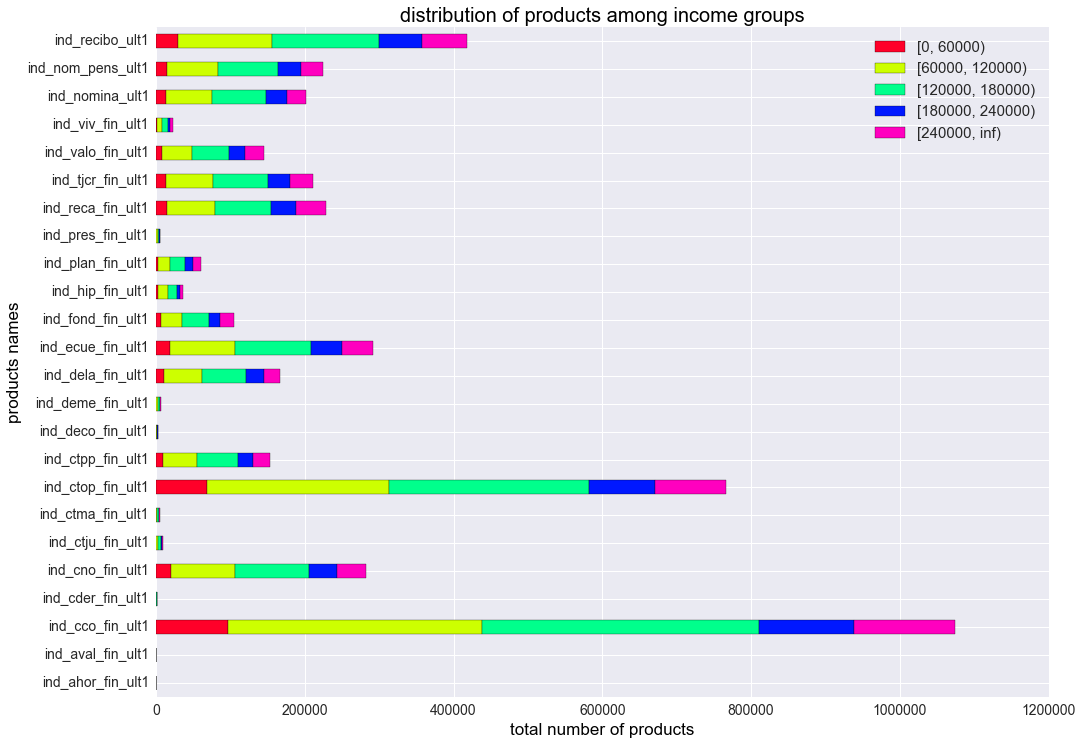

In [82]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12],colormap='gist_rainbow')
plt.title('distribution of products among income groups', fontsize=20, color='black')
plt.xlabel('total number of products', fontsize=17, color='black')
plt.ylabel('products names', fontsize=17, color='black')
plt.legend(prop={'size': 15}, loc=1)

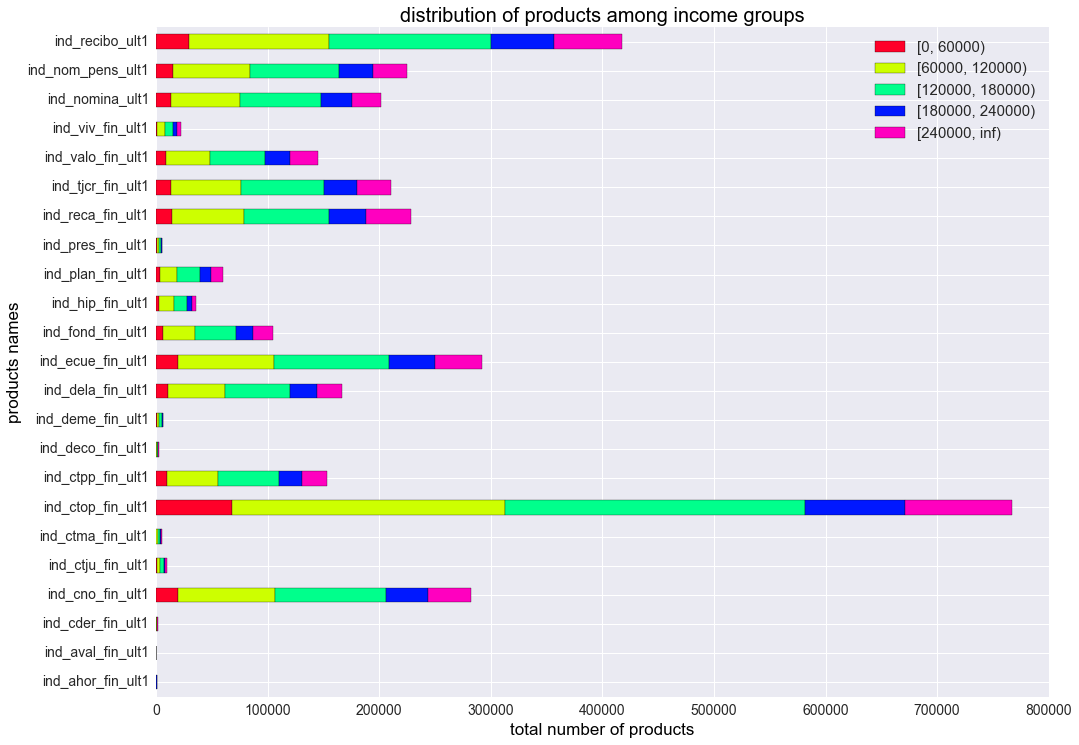

In [83]:
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12],colormap='gist_rainbow')
plt.title('distribution of products among income groups', fontsize=20, color='black')
plt.xlabel('total number of products', fontsize=17, color='black')
plt.ylabel('products names', fontsize=17, color='black')
plt.legend(prop={'size': 15}, loc=1)

In [84]:
df_a = (df.groupby(pd.cut(df['age'], [0, 20, 40, 60, 80, 100, pd.np.inf], right=False)).sum())

In [85]:
df_a

,index,ncodpers,age,antiguedad,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"[0, 20)",28783996813,3882144533,170593.0,1584825.0,12380.0,10224.0,10224.0,273989.0,6838.0,1.538120e+09,0,0,1,0,0,9303,0,0,0,0,0,2,1,0,0,0,0,17,0,0,0,1.0,18.0,0,9343.0
"[20, 40)",248511507370,33825851398,4036157.0,18294713.0,124509.0,114905.0,114905.0,3179930.0,64365.0,1.732449e+10,5,6,61821,17,15700,253,433,44503,8398,136,233,5280,18383,2584,790,1053,196,13860,9625,4793,1647,11876.0,12021.0,23250,236863.0
"[40, 60)",1872920599820,261091249305,62990087.0,231222083.0,1368573.0,1293411.0,1293407.0,35033969.0,795446.0,2.000070e+11,669,139,714222,1163,221976,0,3466,487856,117382,1854,4903,105295,202651,67382,31598,47100,4098,175624,165649,104862,19772,173231.0,176888.0,328020,3155800.0
"[60, 80)",611449578325,85334111007,28823905.0,75430637.0,464916.0,424640.0,424638.0,11475487.0,223320.0,7.006856e+10,68,17,229321,346,39386,0,1188,169298,22809,512,1146,44202,60414,28057,3730,11990,1178,33763,33107,29811,1131,16038.0,31753.0,58638,817903.0
"[80, 100)",200426423104,27809927418,11105336.0,22603179.0,149074.0,128494.0,128494.0,3553791.0,56164.0,2.065180e+10,0,0,66134,34,4947,0,238,62204,4254,134,431,11841,10746,6882,27,221,191,5203,2276,5886,161,300.0,4209.0,7853,194172.0
"[100, inf)",11101507447,1535055156,697187.0,1215838.0,8401.0,6735.0,6735.0,186698.0,1484.0,1.251293e+09,0,0,2840,0,13,0,3,3062,107,0,0,92,102,137,0,0,17,94,27,56,0,0.0,7.0,62,6619.0


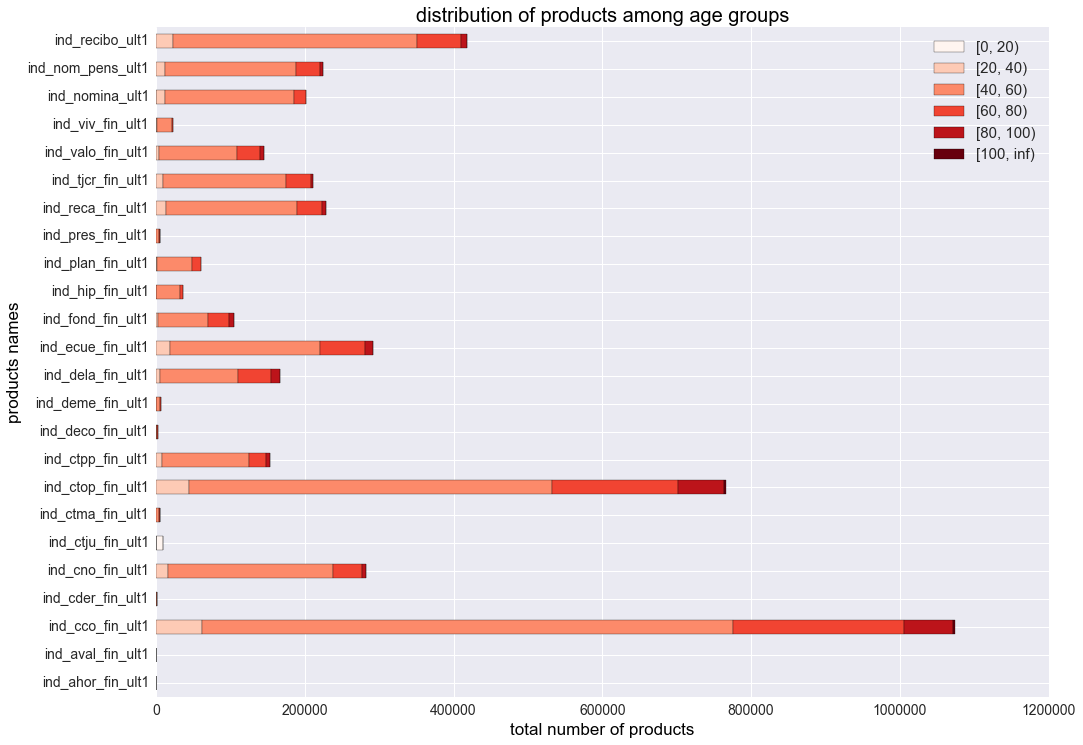

In [86]:
df_a = df_a.loc[:, 'ind_ahor_fin_ult1': 'ind_recibo_ult1']
df_a = df_a.T
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12],colormap='Reds')
plt.title('distribution of products among age groups', fontsize=20, color='black')
plt.xlabel('total number of products', fontsize=17, color='black')
plt.ylabel('products names', fontsize=17, color='black')
plt.legend(prop={'size': 15}, loc=1)

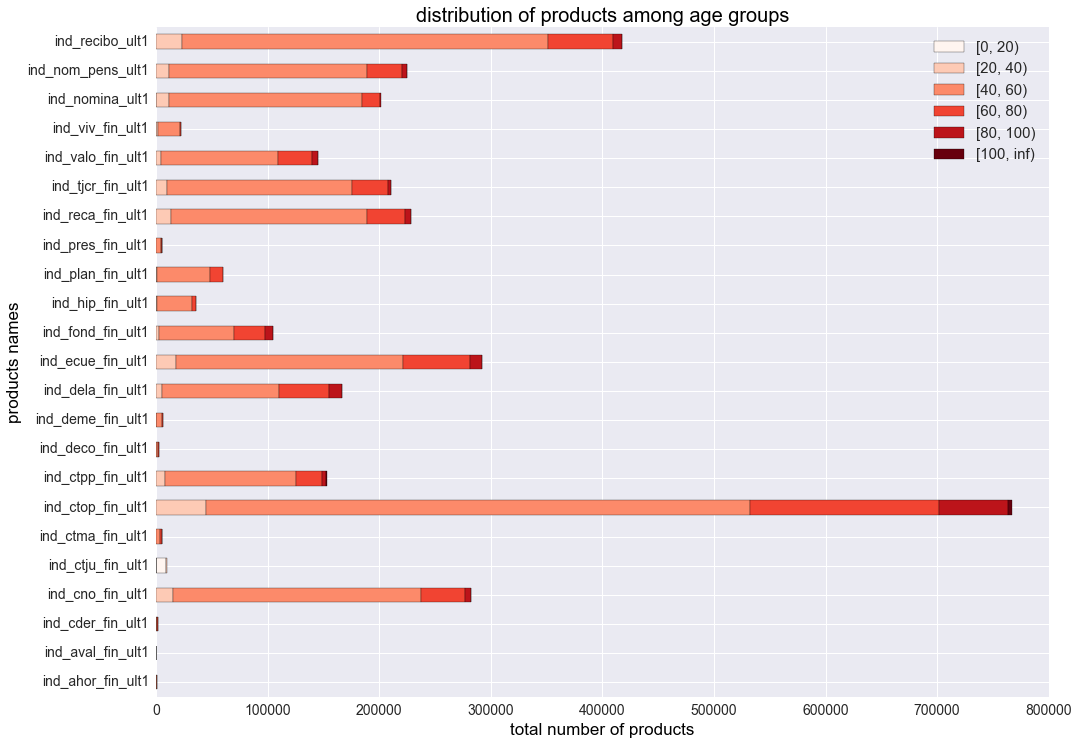

In [89]:
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12],colormap='Reds')
plt.title('distribution of products among age groups', fontsize=20, color='black')
plt.xlabel('total number of products', fontsize=17, color='black')
plt.ylabel('products names', fontsize=17, color='black')
plt.legend(prop={'size': 15}, loc=1)

In [90]:
df.canal_entrada.value_counts().head()

KAT    1140706
KFC     488083
KFA      61016
KAS      56922
KAY      39546
Name: canal_entrada, dtype: int64

In [91]:
df_a = df.loc[:, ['canal_entrada']].join(df.loc[:, 'ind_ahor_fin_ult1': 'ind_recibo_ult1'])
subset = ['KAT', 'KFC', 'KFA', 'KAS', 'KAY']
df_a = df_a.loc[df_a.canal_entrada.isin(subset)]

In [92]:
df_a = df_a.groupby('canal_entrada').agg('sum')
df_a = df_a.T

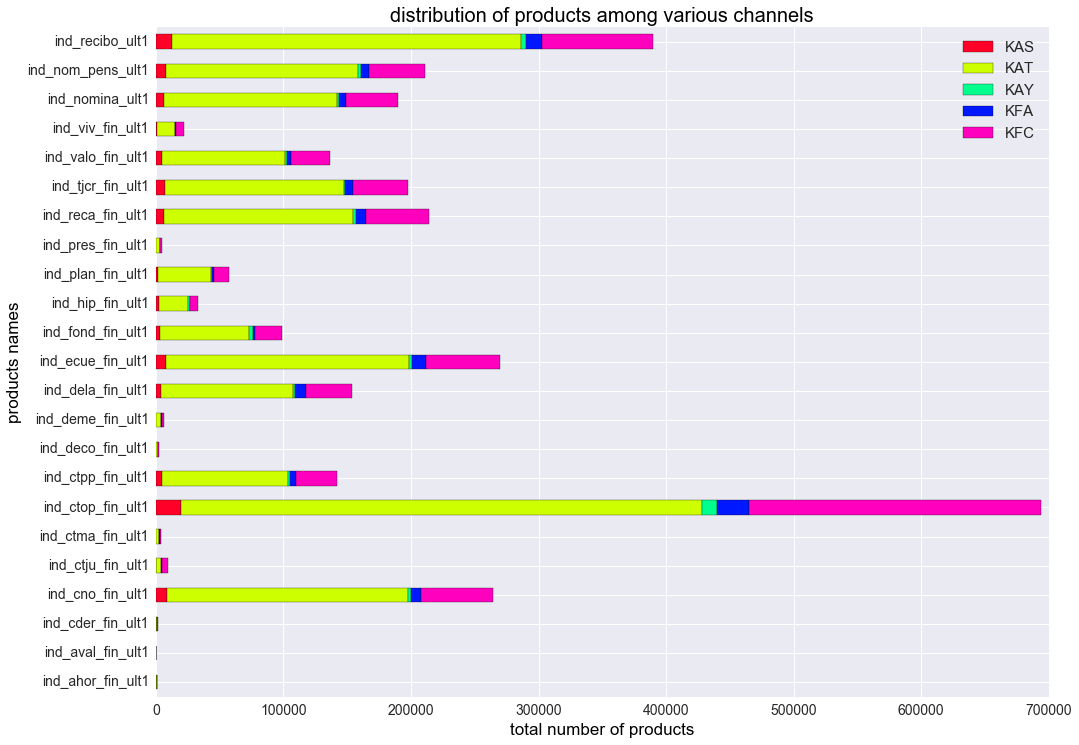

In [93]:
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12],colormap='gist_rainbow')
plt.title('distribution of products among various channels', fontsize=20, color='black')
plt.xlabel('total number of products', fontsize=17, color='black')
plt.ylabel('products names', fontsize=17, color='black')
plt.legend(prop={'size': 15}, loc=1)

In [111]:
df_a = df.loc[:, ['antiguedad']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
df_a = (df_a.groupby(pd.cut(df_a['antiguedad'], [0,50,100,150,200, pd.np.inf], right=False))
                     .sum())

In [112]:
df_a = df_a.drop(['antiguedad'], axis=1).T

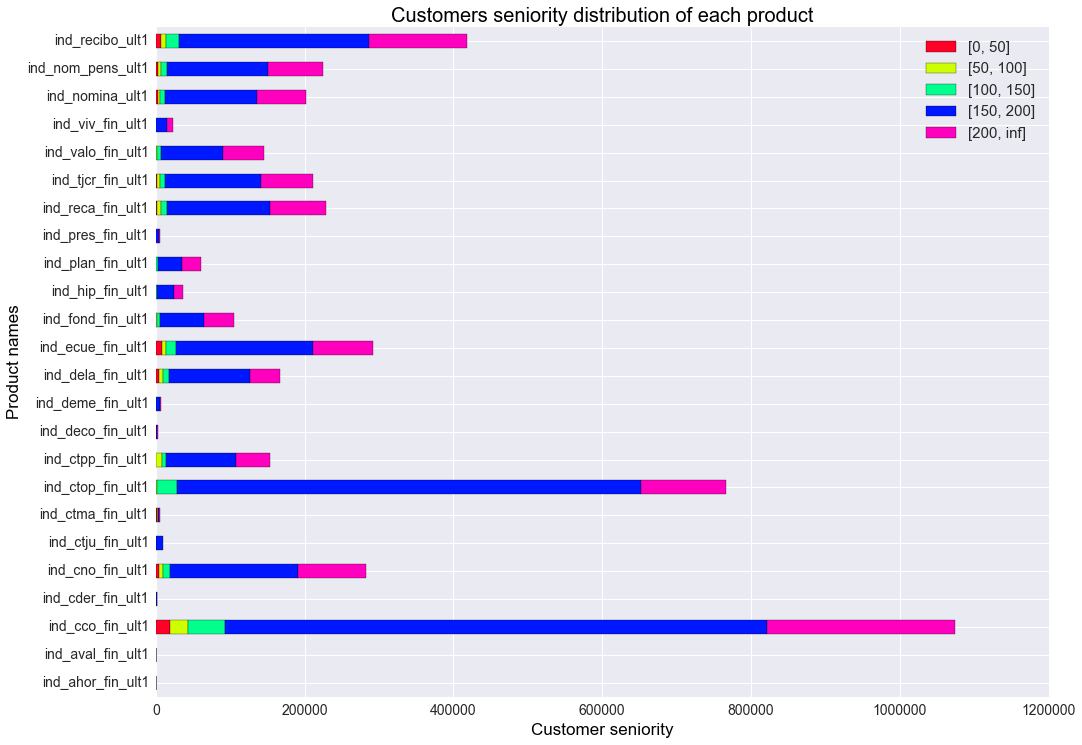

In [113]:
# Customers' seniority distribution of each product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers seniority distribution of each product', fontsize=20, color='black') 
plt.xlabel('Customer seniority', fontsize=17, color='black') 
plt.ylabel('Product names', fontsize=17, color='black') 
plt.legend([[0, 50], [50, 100], [100, 150], [150, 200], [200, inf]], prop={'size':15}) 

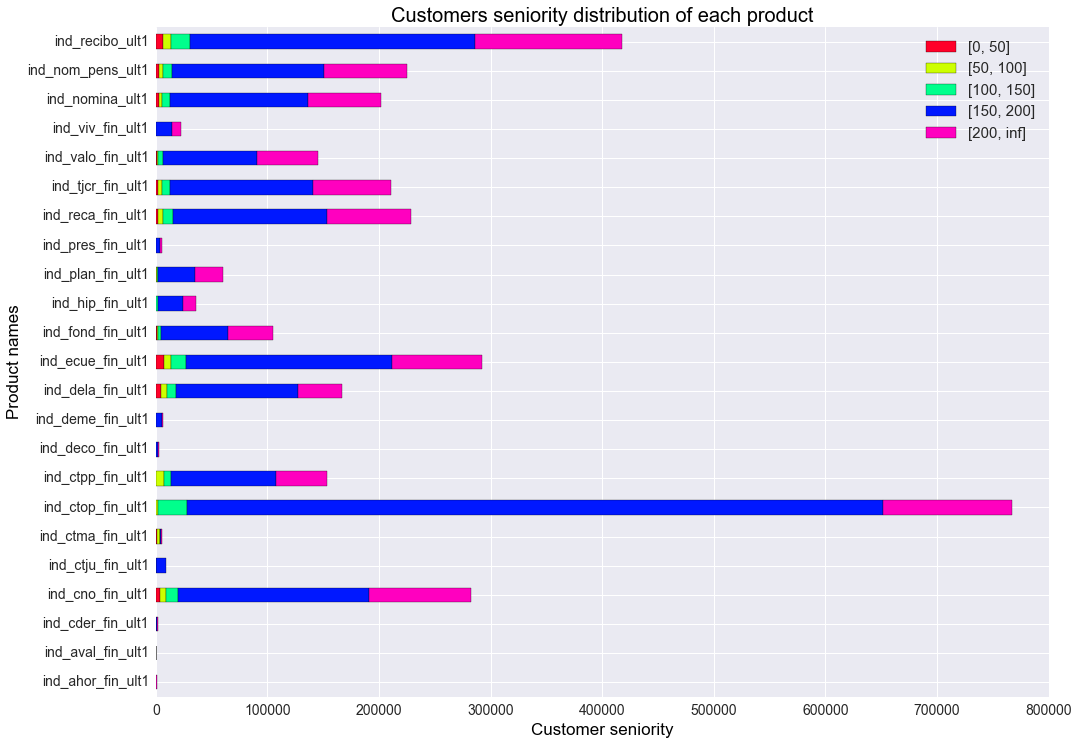

In [115]:
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T
# Customers' seniority distribution of each product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers seniority distribution of each product', fontsize=20, color='black') 
plt.xlabel('Customer seniority', fontsize=17, color='black') 
plt.ylabel('Product names', fontsize=17, color='black') 
plt.legend([[0, 50], [50, 100], [100, 150], [150, 200], [200, inf]], prop={'size':15}) 

In [116]:
df_a = df.tot_products.value_counts()

In [117]:
df_a = pd.DataFrame(df_a)

In [118]:
df.ncodpers.count()

1978403

In [119]:
count = df.ncodpers.count()
df_a["percentage"] = (df_a.tot_products/count)* 100
df_a

,tot_products,percentage
1.0,548529,27.725848
2.0,433853,21.929455
0.0,373553,18.881542
3.0,204525,10.337884
4.0,125927,6.365083
5.0,92596,4.680341
6.0,77396,3.912044
7.0,58721,2.968101
8.0,35365,1.787553
9.0,17757,0.897542


In [120]:
df_a = df[df.tot_products == 1]
df_a = df_a[df_a.ind_cco_fin_ult1 == 1]

In [122]:
a = df_a.ncodpers.count()
b = len(df)
c = len(df[df.tot_products == 1])

print('%.2f' %((1.0*c/b)*100), '% of the customers had purchased only one product')
print('%.2f' %((1.0*a/b)*100), '% of the customers had the current account as the only one product')
print('%.2f' %((1.0*a/c)*100), '% of the customers when they have only one product, this product is the current account')

('27.73', '% of the customers had purchased only one product')
('14.88', '% of the customers had the current account as the only one product')
('53.66', '% of the customers when they have only one product, this product is the current account')


In [123]:
df_a = df[df.tot_products==1]
df_a = df_a.loc[:, ["tot_products"]].join(df_a.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"])

df_a = df_a.groupby("tot_products").agg("sum")
df_a = df_a.T

In [125]:
df_a.head()

tot_products,1.0
ind_ahor_fin_ult1,114.0
ind_aval_fin_ult1,0.0
ind_cco_fin_ult1,294358.0
ind_cder_fin_ult1,90.0
ind_cno_fin_ult1,2653.0


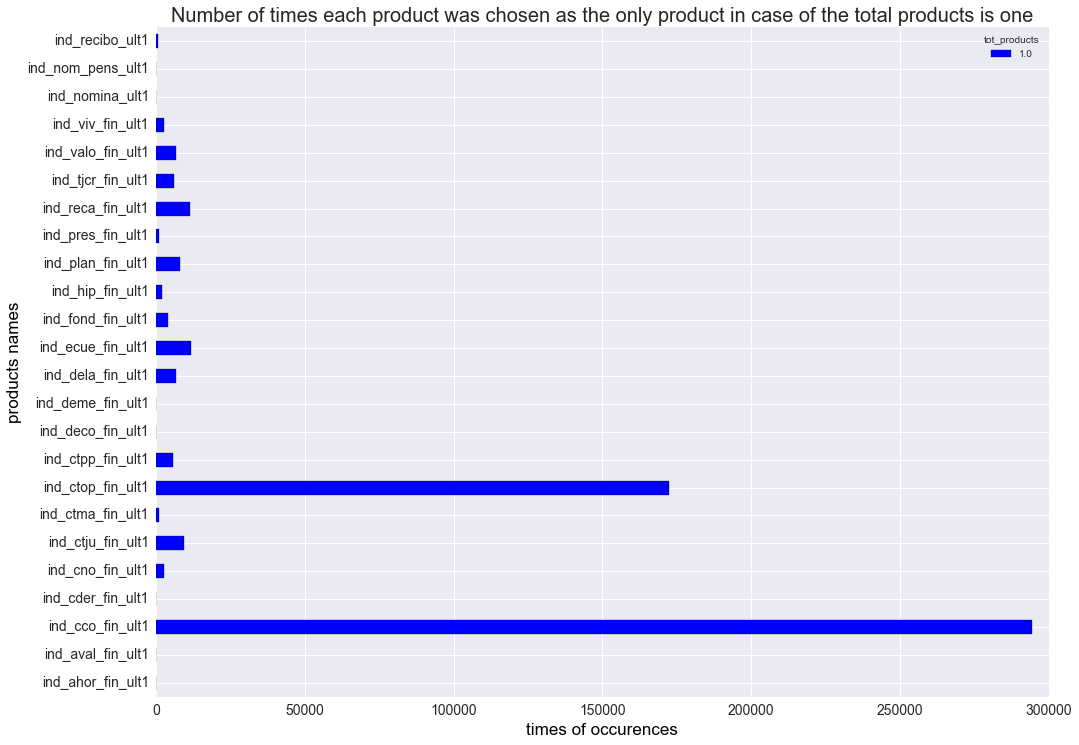

In [126]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='winter')
plt.title('Number of times each product was chosen as the only product in case of the total products is one', fontsize=20) 
plt.xlabel('times of occurences', fontsize=17, color='black') 
plt.ylabel('products names', fontsize=17, color='black') 

In [128]:
df_a = df[df["tot_products"]==2]
df_a = df_a[df_a["ind_cco_fin_ult1"] == 1]
df_a.ncodpers.count()

395400

In [129]:
df_a = df_a.loc[:, ["tot_products"]].join(df_a.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"])
df_a = df_a.groupby('tot_products').agg('sum')
df_a = df_a.T

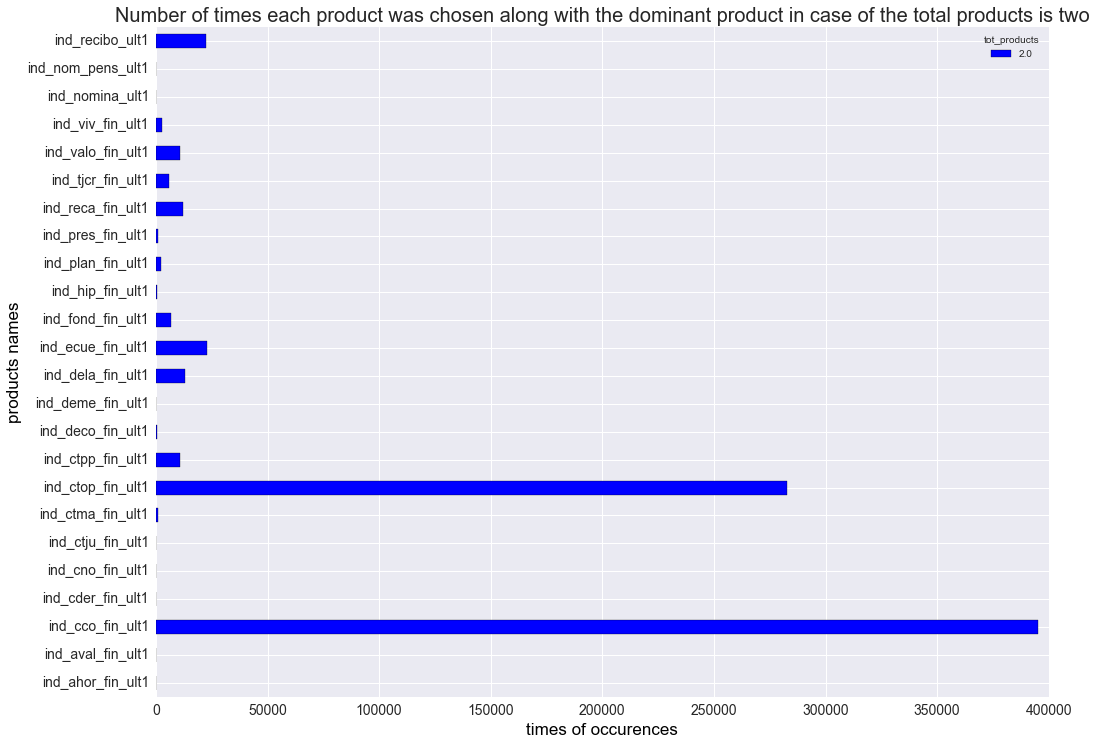

In [130]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='winter')
plt.title('Number of times each product was chosen along with the dominant product in case of the total products is two', fontsize=20) 
plt.xlabel('times of occurences', fontsize=17, color='black') 
plt.ylabel('products names', fontsize=17, color='black') 

In [131]:
df_a = df[df.tot_products==0]

In [132]:
df_a.ind_actividad_cliente.value_counts()

0.0    370717
1.0      2836
Name: ind_actividad_cliente, dtype: int64

In [134]:
# Categories by total products
df_a = df.loc[:, ["tot_products"]].join(df.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_a = df_a.groupby('tot_products').agg('sum')
df_a = df_a.T

In [135]:
df_a.head()

tot_products,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
ind_ahor_fin_ult1,0.0,114.0,74.0,140.0,191.0,89.0,48.0,15.0,7.0,10.0,19.0,9.0,7.0,5.0,14.0
ind_aval_fin_ult1,0.0,0.0,0.0,2.0,33.0,1.0,2.0,26.0,34.0,17.0,26.0,17.0,4.0,0.0,0.0
ind_cco_fin_ult1,0.0,294358.0,395400.0,180964.0,92667.0,44993.0,24295.0,17281.0,12020.0,7461.0,3069.0,1231.0,471.0,108.0,21.0
ind_cder_fin_ult1,0.0,90.0,172.0,289.0,255.0,292.0,91.0,101.0,65.0,64.0,36.0,45.0,31.0,29.0,0.0
ind_cno_fin_ult1,0.0,2653.0,9070.0,18132.0,32695.0,50121.0,59271.0,51582.0,32281.0,16586.0,6592.0,2308.0,566.0,144.0,21.0


In [142]:
(100*df_a[1]/df_a[1].sum()).sort_values(ascending=False)

ind_cco_fin_ult1     53.663161
ind_ctop_fin_ult1    31.452849
ind_ecue_fin_ult1     2.134436
ind_reca_fin_ult1     2.085396
ind_ctju_fin_ult1     1.729717
ind_plan_fin_ult1     1.485245
ind_valo_fin_ult1     1.254811
ind_dela_fin_ult1     1.246242
ind_tjcr_fin_ult1     1.094928
ind_ctpp_fin_ult1     1.068129
ind_fond_fin_ult1     0.725942
ind_viv_fin_ult1      0.501705
ind_cno_fin_ult1      0.483657
ind_hip_fin_ult1      0.396515
ind_ctma_fin_ult1     0.217673
ind_pres_fin_ult1     0.216397
ind_recibo_ult1       0.151131
ind_deco_fin_ult1     0.035185
ind_ahor_fin_ult1     0.020783
ind_cder_fin_ult1     0.016408
ind_deme_fin_ult1     0.011668
ind_nom_pens_ult1     0.008021
ind_nomina_ult1       0.000000
ind_aval_fin_ult1     0.000000
Name: 1.0, dtype: float64

In [143]:
(100*df_a[2]/df_a[2].sum()).sort_values(ascending=False)

ind_cco_fin_ult1     45.568430
ind_ctop_fin_ult1    34.824583
ind_ecue_fin_ult1     3.628072
ind_recibo_ult1       3.094136
ind_dela_fin_ult1     2.437346
ind_reca_fin_ult1     2.277269
ind_ctpp_fin_ult1     1.622324
ind_valo_fin_ult1     1.552484
ind_fond_fin_ult1     1.187499
ind_cno_fin_ult1      1.045285
ind_tjcr_fin_ult1     0.991234
ind_plan_fin_ult1     0.578998
ind_viv_fin_ult1      0.491872
ind_hip_fin_ult1      0.166301
ind_pres_fin_ult1     0.162267
ind_ctma_fin_ult1     0.148553
ind_nom_pens_ult1     0.091967
ind_deme_fin_ult1     0.045177
ind_deco_fin_ult1     0.035150
ind_cder_fin_ult1     0.019822
ind_nomina_ult1       0.015443
ind_ahor_fin_ult1     0.008528
ind_ctju_fin_ult1     0.007261
ind_aval_fin_ult1     0.000000
Name: 2.0, dtype: float64

In [144]:
(100*df_a[3]/df_a[3].sum()).sort_values(ascending=False)

ind_cco_fin_ult1     29.493379
ind_ctop_fin_ult1    19.765636
ind_recibo_ult1      10.352443
ind_ecue_fin_ult1     7.222263
ind_dela_fin_ult1     6.779937
ind_valo_fin_ult1     4.801532
ind_reca_fin_ult1     4.529846
ind_tjcr_fin_ult1     3.383612
ind_fond_fin_ult1     3.266430
ind_ctpp_fin_ult1     3.106711
ind_cno_fin_ult1      2.955140
ind_plan_fin_ult1     1.155034
ind_nom_pens_ult1     0.808540
ind_viv_fin_ult1      0.761276
ind_nomina_ult1       0.496435
ind_hip_fin_ult1      0.495783
ind_deme_fin_ult1     0.246914
ind_ctma_fin_ult1     0.132176
ind_pres_fin_ult1     0.094691
ind_deco_fin_ult1     0.081653
ind_cder_fin_ult1     0.047101
ind_ahor_fin_ult1     0.022817
ind_ctju_fin_ult1     0.000326
ind_aval_fin_ult1     0.000326
Name: 3.0, dtype: float64

In [148]:
df_a = df.loc[:,["age"]].join(df.loc[:, 'ind_ahor_fin_ult1': 'ind_recibo_ult1'])
fnc = {c: 'sum' for c in df_a.columns.drop(['age']).tolist()}

In [150]:
df_a = df_a.groupby('age').agg(fnc).reindex_axis(df_a.columns.drop('age'), 1)

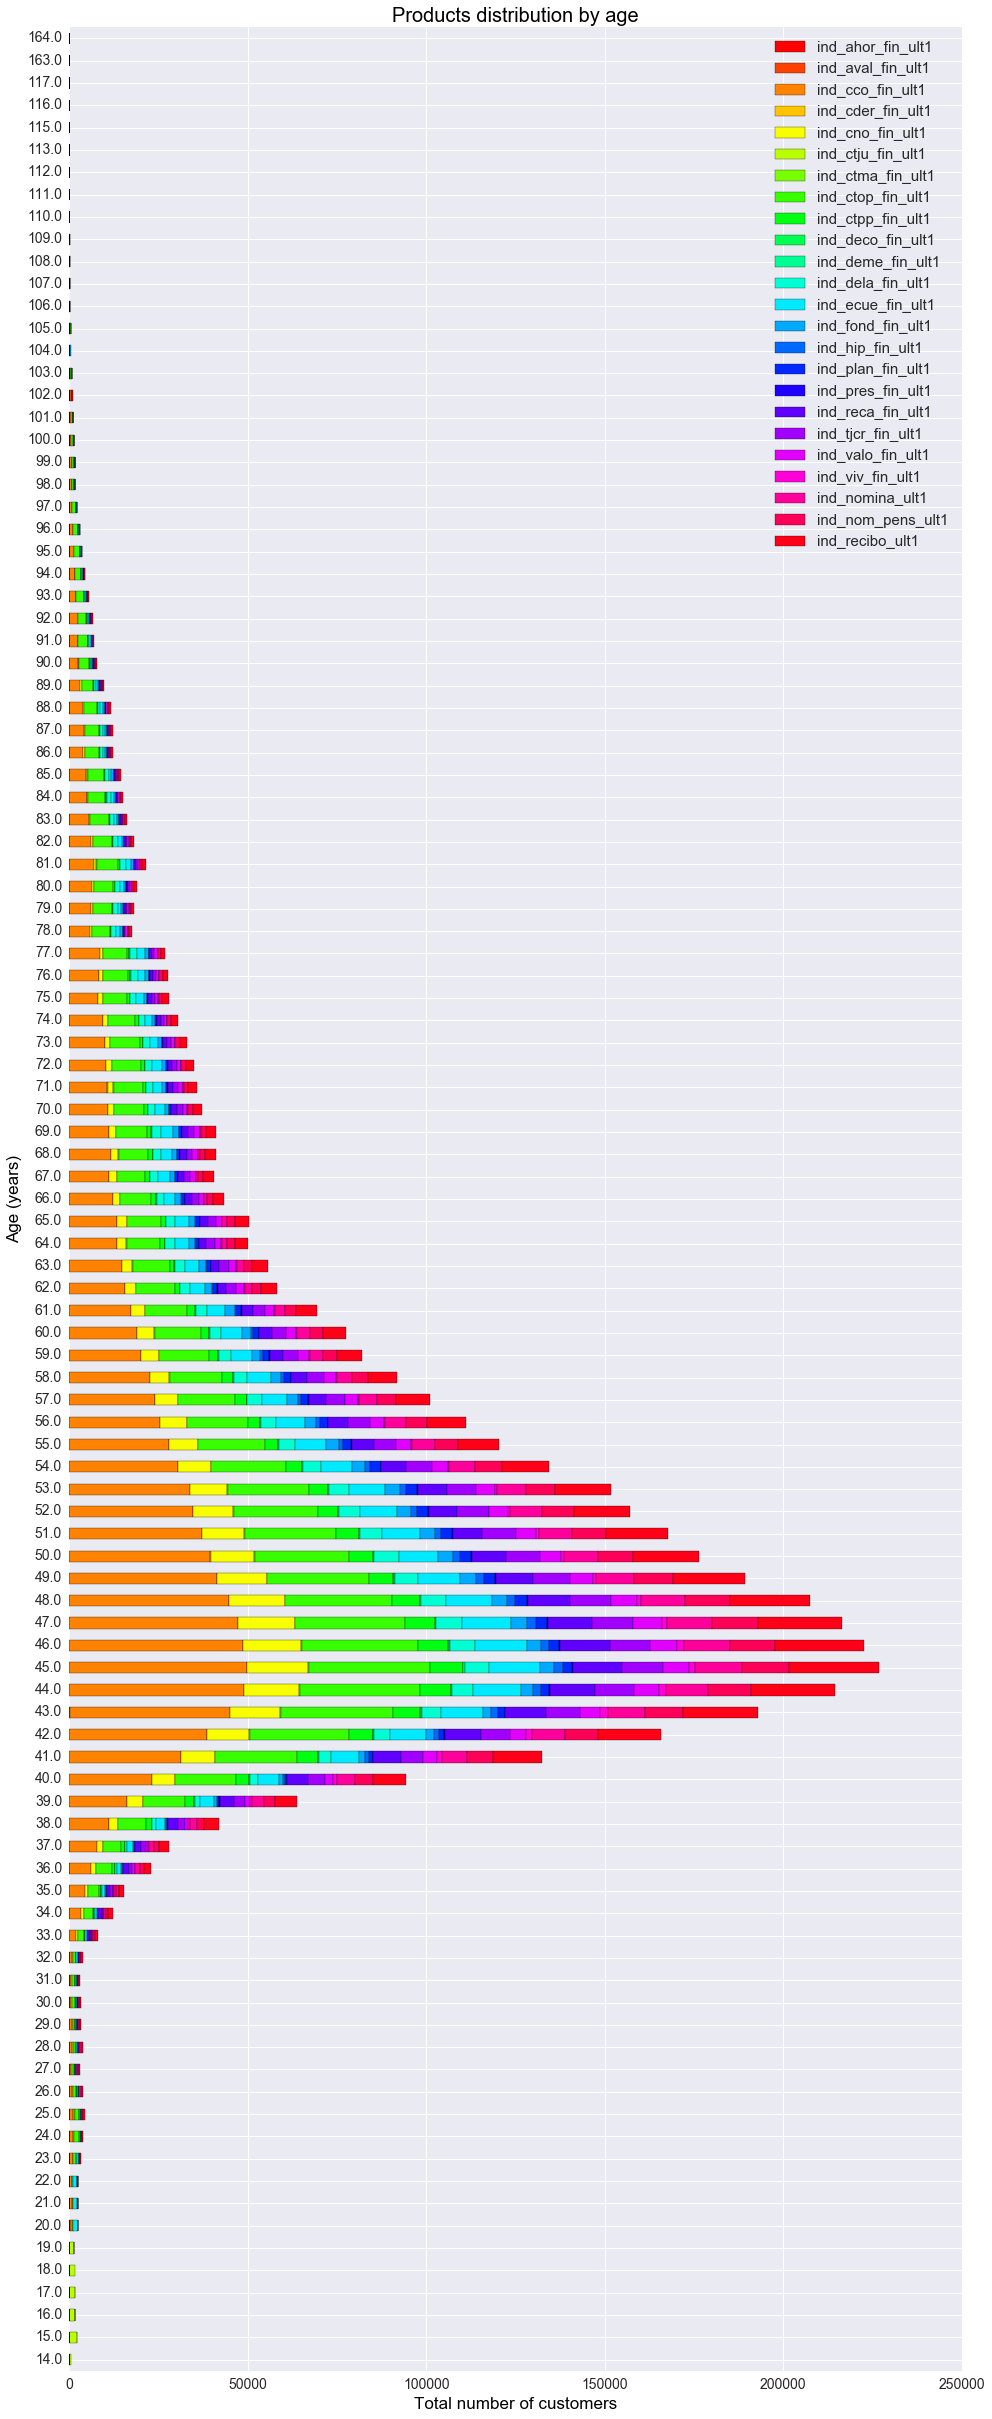

In [151]:
# Products distribution by age
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,42], colormap='hsv')
plt.title('Products distribution by age', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Age (years)', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

In [152]:
df_a = df.loc[:, ['segmento']].join(df.loc[:, 'ind_ahor_fin_ult1': 'ind_recibo_ult1'])
df_a = df_a.groupby('segmento').agg('sum')
df_a = df_a.T

In [153]:
df_a.head()

segmento,01 - TOP,02 - PARTICULARES,03 - UNIVERSITARIO
ind_ahor_fin_ult1,88.0,654.0,0.0
ind_aval_fin_ult1,82.0,80.0,0.0
ind_cco_fin_ult1,112162.0,953686.0,8491.0
ind_cder_fin_ult1,419.0,1139.0,2.0
ind_cno_fin_ult1,77935.0,196299.0,7788.0


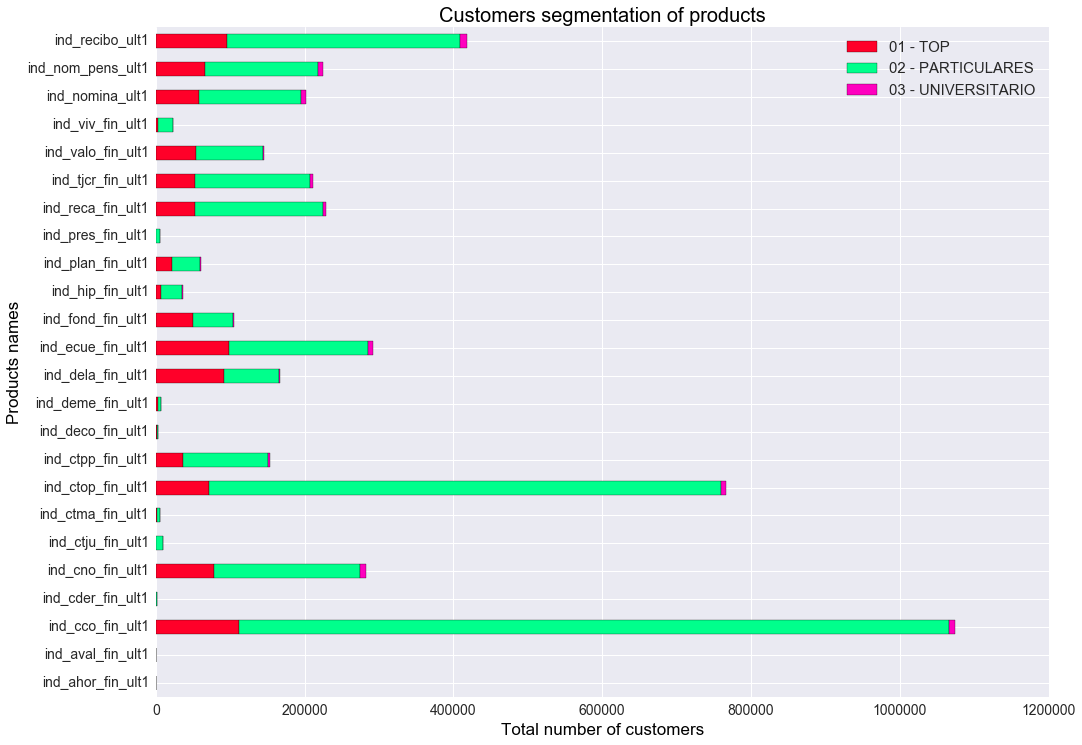

In [154]:
# Customers segment of each product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers segmentation of products', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

In [156]:
df_a = df.loc[:, ["ind_actividad_cliente"]].join(df.loc[:, 'ind_ahor_fin_ult1': 'ind_recibo_ult1'])
df_a = df_a.groupby('ind_actividad_cliente').agg('sum')
df_a = df_a.T

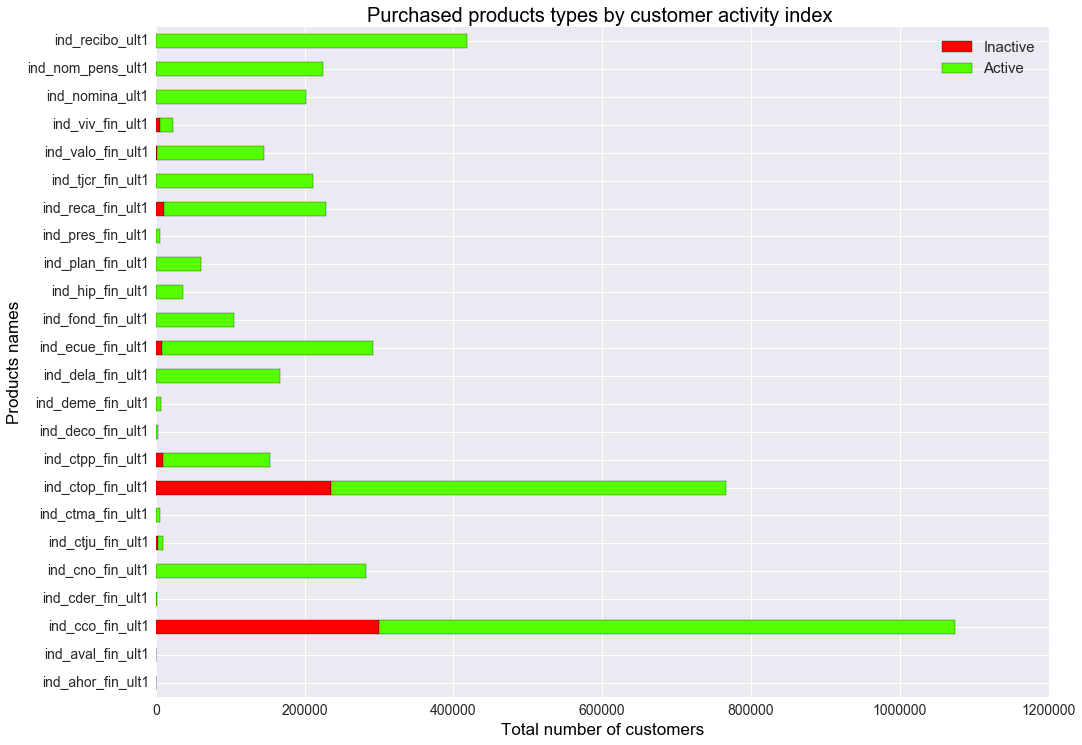

In [157]:
# Purchased products types by customer activity index
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Purchased products types by customer activity index ', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(["Inactive", "Active"], prop={'size':15}) 

In [158]:
df_a = df.loc[:, ["sexo"]].join(df.loc[:, 'ind_ahor_fin_ult1': 'ind_recibo_ult1'])
df_a = df_a.groupby('sexo').agg('sum')
df_a = df_a.T

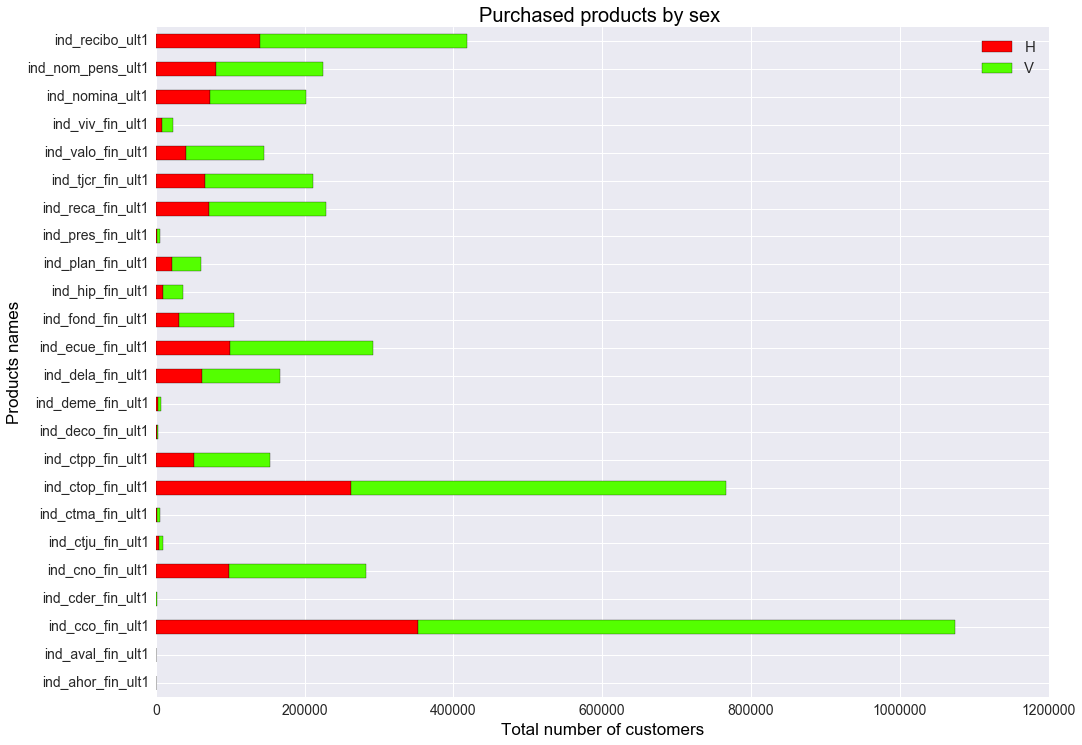

In [159]:
# Percentage of purchased products by sex
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Purchased products by sex ', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

In [160]:
df.sexo.value_counts()

V    1297008
H     681395
Name: sexo, dtype: int64

In [179]:
df_a = df.loc[:, ['age', 'renta', 'antiguedad']].join(df.loc[:, 'ind_ahor_fin_ult1': 'tot_products'])

In [180]:
df_a.head()

,age,renta,antiguedad,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
305503,48.0,125324.70,152.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
1406150,51.0,178393.59,189.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0.0,0.0,0,3.0
127898,45.0,616232.55,172.0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0.0,0.0,0,4.0
1588892,43.0,63577.29,160.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0,3.0
1588900,65.0,125324.70,184.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,3.0


In [181]:
df_a = df_a.dropna(axis=0)

In [182]:
df_a = df_a.groupby('tot_products').agg('mean')
df_b = df_a.loc[:, ['age', 'renta', 'antiguedad']]

In [184]:
df_b.head()

,age,renta,antiguedad
tot_products,,,
0.0,55.822079,149316.474768,179.906294
1.0,55.390882,151752.943184,174.172868
2.0,55.219996,154590.933398,171.444678
3.0,53.994636,160978.627248,176.339905
4.0,52.836493,172163.805929,180.825192


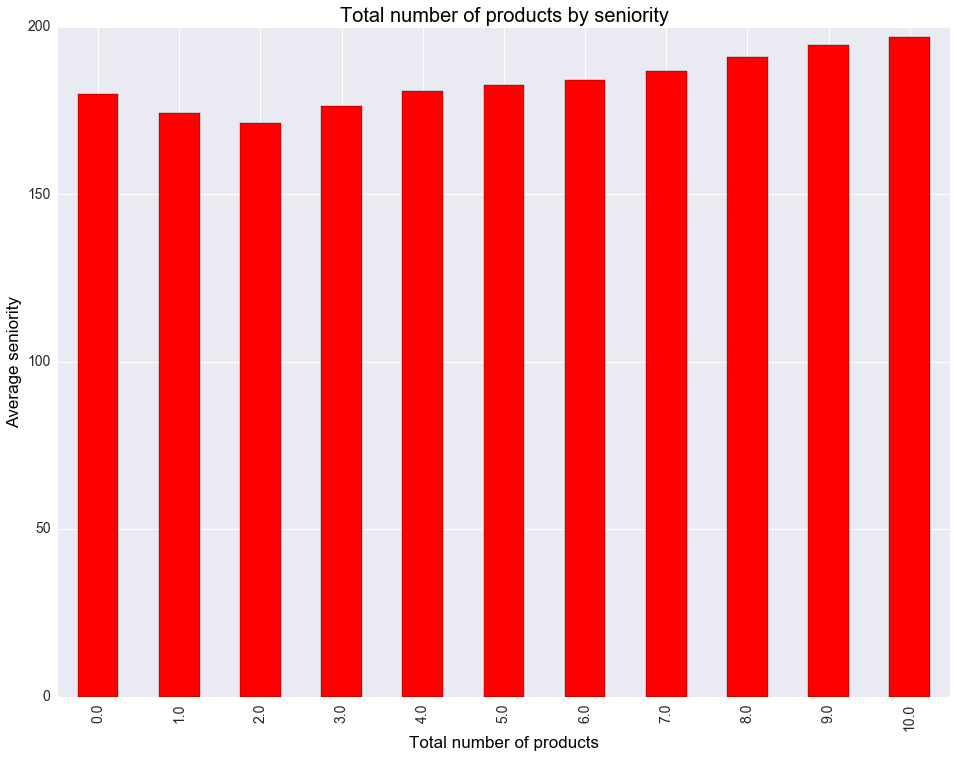

In [185]:
df_a = df_b['antiguedad'][0:10]
# Total number of products by seniority
df_a.plot(kind='bar', fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Total number of products by seniority', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average seniority', fontsize=17, color='black') 
#plt.legend(prop={'size':15}) 

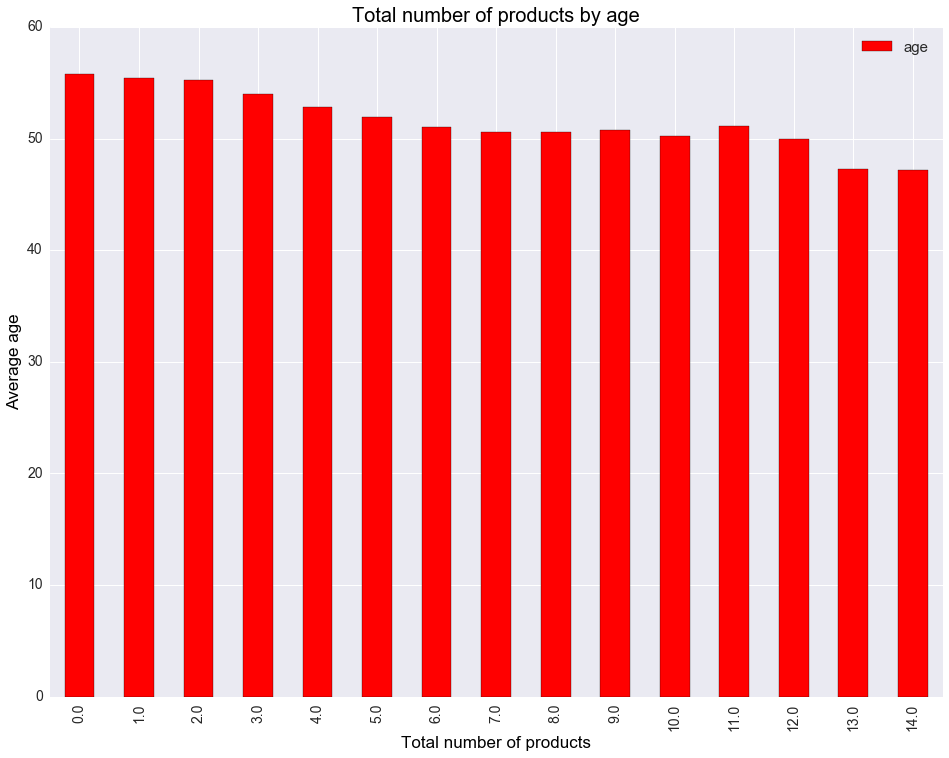

In [186]:
df_a = df_b["age"]
# Total number of products by age
df_a.plot(kind='bar', fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Total number of products by age', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average age', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

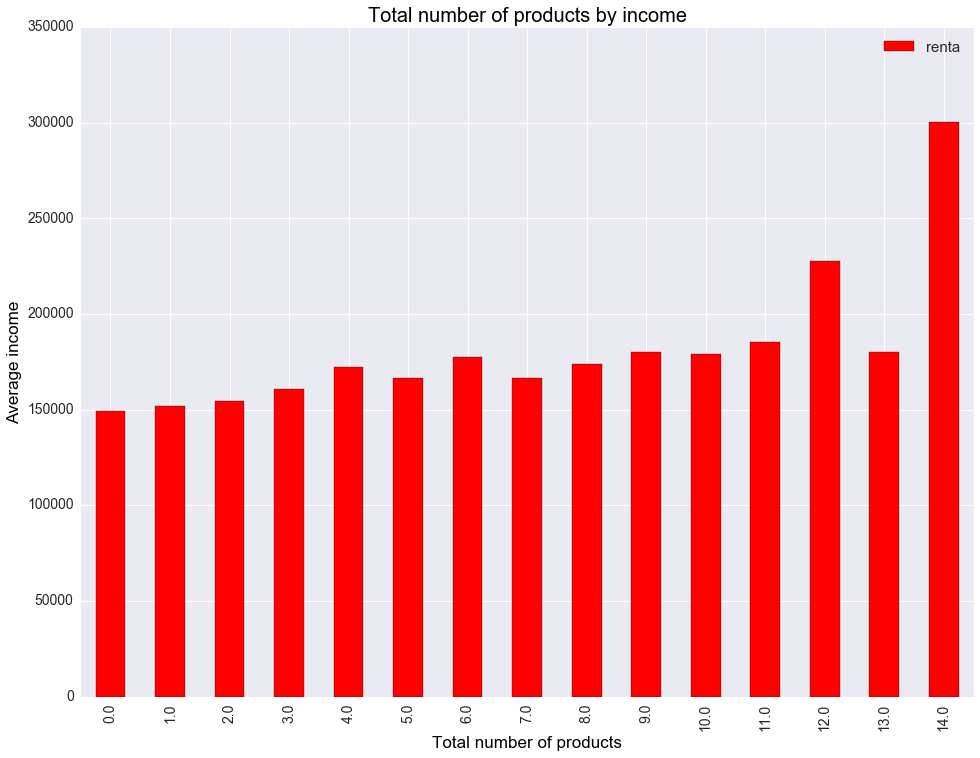

In [187]:
df_a = df_b["renta"]
# Total number of products by income
df_a.plot(kind='bar', fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Total number of products by income', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average income', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 